In [1]:
import pandas as pd

In [2]:
df_feature_x = pd.read_csv("preprocess.csv", index_col=0)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,40,30,2
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,6


In [3]:
df_feature_y = pd.read_csv("label.csv", index_col=0)
df_feature_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

norm_scaler = StandardScaler()

years_code = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_code_pro = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
comp_skill = df_feature_x["ComputerSkills"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_code, years_code_pro, comp_skill))

new_values = norm_scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.767551,-0.640488,-1.335861
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.235925,-0.514862,-0.202361
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083050,-0.389236,-0.910798
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.554901,-0.389236,-0.060674
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.741180,2.625783,-1.619236
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.554901,-0.891739,-1.194173
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.252628,1.118274,0.506076
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.023275,-0.514862,-1.335861
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.634855,1.495151,-1.477548
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.614676,0.867022,-1.052486


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

years_code = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_code_pro = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
comp_skill = df_feature_x["ComputerSkills"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_code, years_code_pro, comp_skill))

new_values = scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.14,0.08,0.037383
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.24,0.10,0.112150
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.30,0.12,0.065421
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.18,0.12,0.121495
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.80,0.60,0.018692
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.18,0.04,0.046729
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.52,0.36,0.158879
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.28,0.10,0.037383
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.78,0.42,0.028037
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.40,0.32,0.056075


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.1, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 66115
Validation data: 7347


In [7]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [8]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

2023-11-08 17:46:06.088281: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 17:46:06.088355: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 17:46:06.088376: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 17:46:06.096156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 17:46:09.056205: I tensorflow/compiler/

Epoch 1/20


2023-11-08 17:46:10.649222: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc2ca7623a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 17:46:10.649294: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-08 17:46:10.655466: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-08 17:46:10.671889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-08 17:46:10.780757: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2067/2067 [==============================] - 18s 8ms/step - loss: 0.5587 - accuracy: 0.6974 - val_loss: 0.4591 - val_accuracy: 0.7715
Epoch 2/20
2067/2067 [==============================] - 15s 7ms/step - loss: 0.4524 - accuracy: 0.7811 - val_loss: 0.4504 - val_accuracy: 0.7869
Epoch 3/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4510 - accuracy: 0.7809 - val_loss: 0.4504 - val_accuracy: 0.7822
Epoch 4/20
2067/2067 [==============================] - 19s 9ms/step - loss: 0.4501 - accuracy: 0.7822 - val_loss: 0.4480 - val_accuracy: 0.7826
Epoch 5/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4497 - accuracy: 0.7804 - val_loss: 0.4483 - val_accuracy: 0.7807
Epoch 6/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4492 - accuracy: 0.7815 - val_loss: 0.4578 - val_accuracy: 0.7843
Epoch 7/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4485 - accuracy: 0.7819 - val_loss: 0.4465 - val_accuracy: 0.7

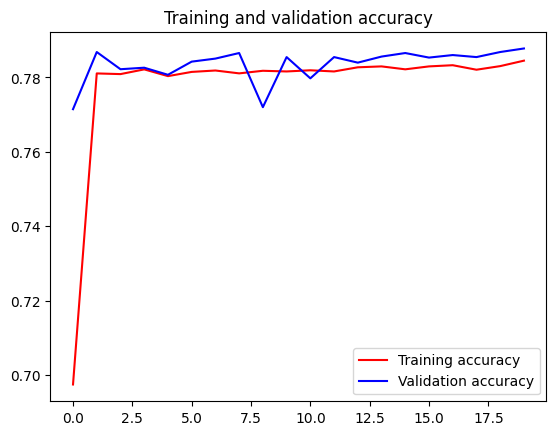

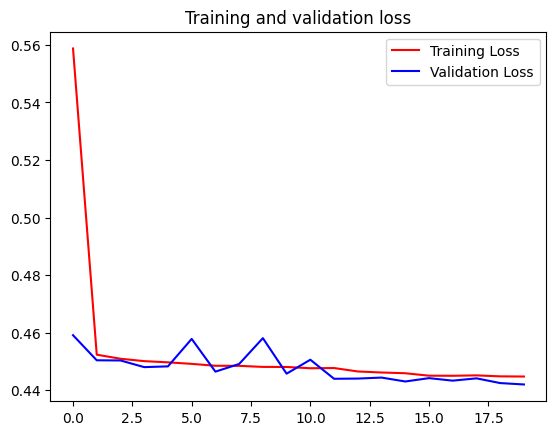

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 74ms/step


array([[1.0000000e+00, 1.0131536e-25]], dtype=float32)